Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


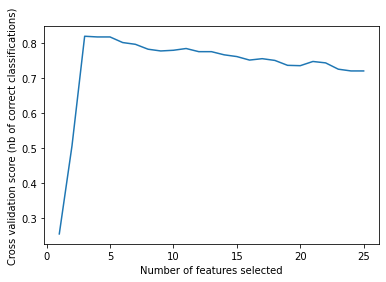

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE, RFECV
from sklearn.feature_selection import SelectFromModel

X,y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                          n_redundant=2, n_repeated=0, n_classes=8,
                          n_clusters_per_class=1, random_state=0)

svc = SVC(kernel='linear')
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy', verbose=2)
rfecv.fit(X,y)

print('Optimal number of features : %d'%rfecv.n_features_)

plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [3]:
X,y = make_classification(n_samples=10000, n_features=25, n_informative=3,
                          n_redundant=2, n_repeated=0, n_classes=8,
                          n_clusters_per_class=1, random_state=0)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


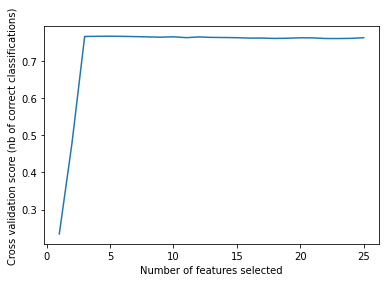

In [4]:
# 실상황에서 시간이 오래걸리기에 적용하기에 어려움
svc = SVC(kernel='linear')
"""verbose : 일반적으로 함수 수행 시 발생하는 상세한 정보들을 표준 출력으로 자세히 내보낼 것인가를 나타냄
    0은 출력하지 않음(False), 1은 자세히 출력(True), 2는 함축적인 정보만 출력
"""
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy', verbose=2)
rfecv.fit(X,y)

print('Optimal number of features : %d'%rfecv.n_features_)

plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [5]:
from sklearn.datasets import load_diabetes

diabets = load_diabetes()
X,y = diabets.data, diabets.target
print(diabets.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

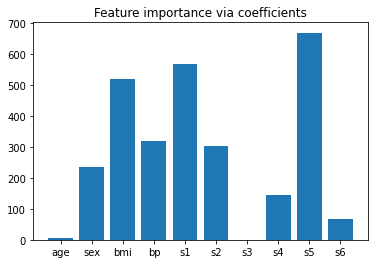

In [6]:
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X,y)
importance = np.abs(lasso.coef_)
feature_names = np.array(diabets.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title('Feature importance via coefficients')
plt.show()


In [7]:
from time import time
threshold = np.sort(importance)[-3] + 0.01
print('threshold :', threshold)

sfm = SelectFromModel(lasso, threshold=threshold).fit(X,y)
print('Feature selected by SelectFromModel :{}'.format(feature_names[sfm.get_support()]))

threshold : 521.7485426067491
Feature selected by SelectFromModel :['s1' 's5']


### Permutation importance VS Random Forest Feature Importance

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [9]:
X,y = fetch_openml('titanic', version=1, as_frame=True, return_X_y=True)

rng = np.random.RandomState(seed=42)
X['random_cat'] = rng.randint(3, size=X.shape[0])
X['random_num'] = rng.randn(X.shape[0])

categorical_columns = ['pclass', 'sex', 'embarked', 'random_cat']
numerical_columns = ['age', 'sibsp', 'parch', 'fare', 'random_num']

X=X[categorical_columns+numerical_columns]

X_train,X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])
preprocessing = ColumnTransformer([
    ('cat', categorical_pipe, categorical_columns),
    ('num', numerical_pipe, numerical_columns)
])

rf = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex', 'embarked',
                                                   'random_cat']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age', 'sibsp', 'par

In [10]:
print('RF train accuracy : %0.3f'%rf.score(X_train, y_train))
print('RF test accuracy : %0.3f'%rf.score(X_test, y_test))


RF train accuracy : 1.000
RF test accuracy : 0.817


D:\Program\Anaconda\envs\myplace\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


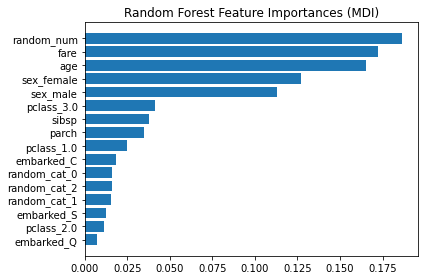

In [12]:
ohe = (rf.named_steps['preprocess'].named_transformers_['cat'].named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_columns)
feature_names = np.r_[feature_names, numerical_columns]

tree_feature_importance = (rf.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importance.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importance[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title('Random Forest Feature Importances (MDI)')
fig.tight_layout()
plt.show()

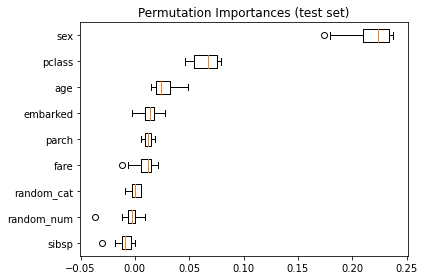

In [16]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title('Permutation Importances (test set)')
fig.tight_layout()
plt.show()

### Regression
   - 최적의 회귀 모델은 잔차의 합이 최소가 되는 모델 또한 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미

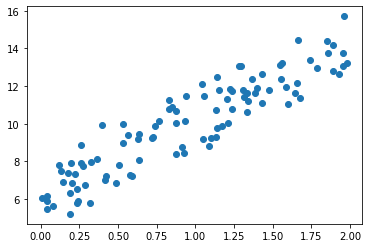

In [18]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = 2*np.random.rand(100, 1)
# y= 4x+6
y = 6+4*X+np.random.randn(100, 1)

plt. scatter(X,y)

In [19]:
X.shape, y.shape

((100, 1), (100, 1))

In [21]:
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N=len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    w0_factors = np.ones((N,1))
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [24]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T)+w0
diff = y- y_pred
print(diff.shape)

w0_factors = np.ones((100,1))
w1_update= -(2/100)*0.01*(np.dot(X.T, diff))
w0_update= -(2/100)*0.01*(np.dot(w0_factors.T, diff))
print(w1_update.shape, w0_update.shape)

(100, 1)
(1, 1) (1, 1)


In [26]:
def gradient_descent_stpes(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1- w1_update
        w0 = w0- w0_update

    return w1, w0

In [27]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost
w1, w0 = gradient_descent_stpes(X,y, iters= 1000)
print('w1 : {0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))


w1 : 4.022 w0:6.162
Gradient Descent Total Cost : 0.9935


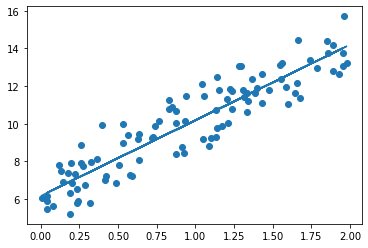

In [28]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [30]:
def stochastic_gradinet_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update

    return w1, w0

In [31]:
np.random.permutation(X.shape[0])

array([66, 71, 54, 88, 82, 12, 36, 46, 14, 67, 10,  3, 62, 29, 97, 69, 70,
       93, 31, 73, 60, 96, 28, 27, 21, 19, 33, 78, 32, 94,  1, 41, 40, 76,
       37, 87, 24, 23, 50,  2, 47, 20, 77, 17, 56, 64, 68, 25, 15, 22, 16,
       98, 63, 92, 86, 38,  6, 57, 95, 44,  9, 42, 81, 99, 35, 84, 59, 48,
       75, 65, 85, 90, 55, 43, 58, 89, 30, 80, 34, 18, 51, 49, 52, 74, 26,
       45, 39,  4, 11, 53, 91, 79,  8,  0,  5, 13, 61, 72,  7, 83])

In [32]:
w1, w0 = stochastic_gradinet_descent_steps(X,y, iters=1000)
print('w1 :', round(w1[0,0],3), 'w0 :',round(w0[0,0],3))
y_pred = w1[0,0] *X+w0
print('Stochastic Gradient Descent Total Cost : {0:.4f}:'.format(get_cost(y, y_pred)))

w1 : 4.028 w0 : 6.156
Stochastic Gradient Descent Total Cost : 0.9937:
